### 가상환경 설정

- cvlib_env 사용

```shell
> python -m venv cvlib_env
```

- 라이브러리 설치

```shell
> pip install opencv-python tensorflow
> pip install cvlib
```

In [1]:
from IPython.display import Image, display

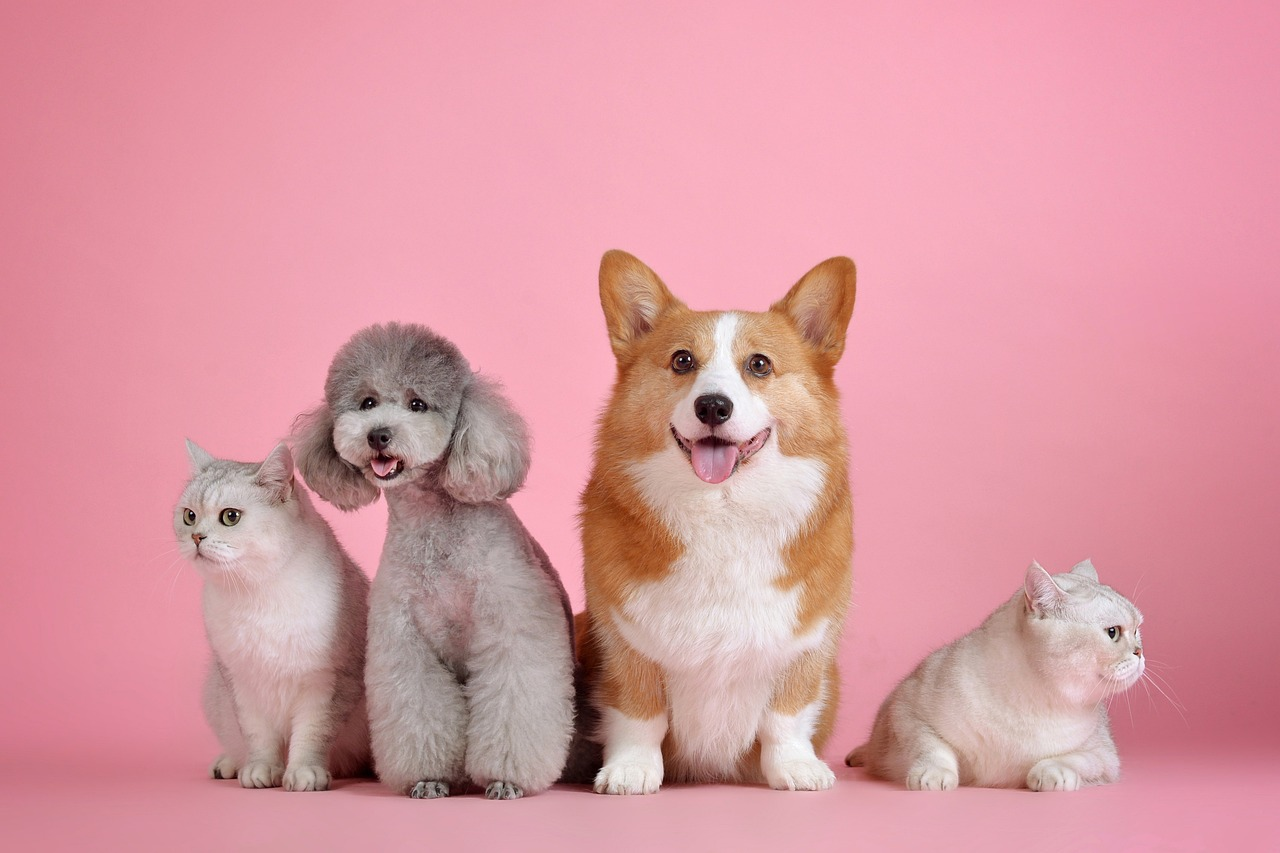

In [2]:
file_path = '../images/cats-and-dogs.jpg'
display(Image(filename=file_path))

### cvlib
- 파이썬에서 얼굴, 객체 인식을 위한 사용하기 쉬운 라이브러리. opencv와 tensorflow를 사용하기 때문에 둘다 설치 필요
- https://www.arunponnusamy.com/cvlib/
- or https://github.com/arunponnusamy/cvlib 

In [3]:
## Image Object Detection
import cv2
import cvlib as cv

image = cv2.imread('../images/people.jpg')
# apply face detection
faces, confidences = cv.detect_face(image)

# loop through detected faces
for face,conf in zip(faces,confidences):

    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]

    # draw rectangle over face
    cv2.rectangle(image, (startX,startY), (endX,endY), (0,255,0), 2)

# display output
# press any key to close window           
cv2.imshow('face_detection', image)
cv2.waitKey()

# save output
cv2.imwrite('./output/face_detection.jpg', image)

# release resources
cv2.destroyAllWindows()

In [4]:
# webcam Object Detection
import cvlib as cv
import cv2

# open webcam
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()
    

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()

    # apply face detection
    face, confidence = cv.detect_face(frame)

    print(face)
    print(confidence)

    # loop through detected faces
    for idx, f in enumerate(face):
        
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        # draw rectangle over face
        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)

        text = "{:.2f}%".format(confidence[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # write confidence percentage on top of face rectangle
        cv2.putText(frame, text, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (0,255,0), 2)

    # display output
    cv2.imshow("Real-time face detection", frame)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
# release resources
webcam.release()
cv2.destroyAllWindows()        

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[[np.int64(374), np.int64(84), np.int64(515), np.int64(282)]]
[np.float32(0.84612834)]
[[np.int64(373), np.int64(86), np.int64(511), np.int64(282)]]
[np.float32(0.75265265)]
[[np.int64(365), np.int64(85), np.int64(511), np.int64(282)]]
[np.float32(0.99395967)]
[[np.int64(365), np.int64(86), np.int64(511), np.int64(281)]]
[np.float32(0.9949812)]
[[np.int64(363), np.int64(83), np.int64(515), np.int64(282)]]
[np.float32(0.99958235)]
[[np.int64(362), np.int64(81), np.int64(516), np.int64(281)]]
[np.float32(0.9997137)]
[[np.int64(362), np.int64(78), np.int64(517), np.int64(280)]]
[np.float32(0.9998903)]
[[np.int64(361), np.int64(78), np.int64(518), np.int64(280)]]
[np.float32(0.99991524)]
[[np.int64(363), np.int64(75), np.int64(518

#### Gender Detection

- 실행문제 : 버전 문제가 있는 듯

In [11]:
# import necessary packages
import cv2
import cvlib as cv
import numpy as np

img = cv2.imread('../images/man_and_woman.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 찾기
faces, confidences = cv.detect_face(img)

for (x, y, x2, y2)in faces:

    # 얼굴 roi 지정
    face_img = img[y:y2, x:x2]

    # 성별 예측하기
    label, confidence = cv.detect_gender(face_img)

    cv2.rectangle(img, (x, y), (x2, y2), (0, 255, 0), 2)

    gender = np.argmax(confidence)
    text = f'{label[gender]}:{confidence[gender]:.1%}'
    cv2.putText(img, text, (x,y-10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0), 1)

# 영상 출력
cv2.imshow('image', img)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

[INFO] Initializing gender detection model ..


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\caffe\caffe_io.cpp:1162: error: (-2:Unspecified error) FAILED: ReadProtoFromTextFile(param_file, param). Failed to parse NetParameter file: C:\Users\perso\.cvlib\pre-trained\gender_deploy.prototxt in function 'cv::dnn::ReadNetParamsFromTextFileOrDie'


#### Object Detection

- CUDA 문제, GPU가 동작하지 않으면 안되는 듯

In [10]:
import cvlib as cv
from cvlib.object_detection import draw_bbox
import sys
import cv2

# read input image
image = cv2.imread('../images/cats-and-dogs.jpg')

# apply object detection
bbox, label, conf = cv.detect_common_objects(image)

print(bbox, label, conf)

# draw bounding box over detected objects
out = draw_bbox(image, bbox, label, conf)

# display output
# press any key to close window           
cv2.imshow("object_detection", out)
cv2.waitKey()

# save output
cv2.imwrite("object_detection.jpg", out)

# release resources
cv2.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_io.cpp:705: error: (-215:Assertion failed) separator_index < line.size() in function 'cv::dnn::darknet::ReadDarknetFromCfgStream'
